In [260]:
import requests 

In [271]:
import pandas as pd 

## Projeto: Análise da Economia de Angola (2000–2024)

##

O objetivo deste projecto é analisar a economia de Angola entre 2000-2024, e perceber o comportamento do PIB Angolano no sentido de verificar se aumentos no PIB de Angola coincidiram com redução na probreza em Angola e na taxa de desemprego.

**** Hipotese : O crescimento da Economia de Angola ( crescimento do PIB ) não foi suficiente para de forma sustentavel reduzir a pobreza e os níveis de desemprego



In [340]:


url = "https://api.worldbank.org/v2/country/AGO/indicator/NY.GDP.MKTP.CD?format=json&per_page=20000"

resposta = requests.get(url)

dados = resposta.json()

df = pd.json_normalize(dados[1])  # a lista de dados está no índice 1
print(df.head())


  countryiso3code  date         value unit obs_status  decimal  \
0             AGO  2024  1.009989e+11                        0   
1             AGO  2023  1.071677e+11                        0   
2             AGO  2022  1.312122e+11                        0   
3             AGO  2021  7.955954e+10                        0   
4             AGO  2020  5.885246e+10                        0   

     indicator.id    indicator.value country.id country.value  
0  NY.GDP.MKTP.CD  GDP (current US$)         AO        Angola  
1  NY.GDP.MKTP.CD  GDP (current US$)         AO        Angola  
2  NY.GDP.MKTP.CD  GDP (current US$)         AO        Angola  
3  NY.GDP.MKTP.CD  GDP (current US$)         AO        Angola  
4  NY.GDP.MKTP.CD  GDP (current US$)         AO        Angola  


In [342]:
display(df)

,countryiso3code,date,value,unit,obs_status,decimal,indicator.id,indicator.value,country.id,country.value
0,AGO,2024,1.009989e+11,,,0,NY.GDP.MKTP.CD,GDP (current US$),AO,Angola
1,AGO,2023,1.071677e+11,,,0,NY.GDP.MKTP.CD,GDP (current US$),AO,Angola
2,AGO,2022,1.312122e+11,,,0,NY.GDP.MKTP.CD,GDP (current US$),AO,Angola
3,AGO,2021,7.955954e+10,,,0,NY.GDP.MKTP.CD,GDP (current US$),AO,Angola
4,AGO,2020,5.885246e+10,,,0,NY.GDP.MKTP.CD,GDP (current US$),AO,Angola
...,...,...,...,...,...,...,...,...,...,...
60,AGO,1964,NaN,,,0,NY.GDP.MKTP.CD,GDP (current US$),AO,Angola
61,AGO,1963,NaN,,,0,NY.GDP.MKTP.CD,GDP (current US$),AO,Angola
62,AGO,1962,NaN,,,0,NY.GDP.MKTP.CD,GDP (current US$),AO,Angola
63,AGO,1961,NaN,,,0,NY.GDP.MKTP.CD,GDP (current US$),AO,Angola


In [344]:
print(len(df))

65


## No codigo a seguir limpei algumas colunas 

In [360]:
df_clean = df[[
    "date", 
    "value",
    "indicator.id", 
    "indicator.value",
    "countryiso3code", 
    "country.value"
]].copy()


In [372]:
display(df_clean)

,date,value,indicator.id,indicator.value,countryiso3code,country.value
64,1960,NaN,NY.GDP.MKTP.CD,GDP (current US$),AGO,Angola
63,1961,NaN,NY.GDP.MKTP.CD,GDP (current US$),AGO,Angola
62,1962,NaN,NY.GDP.MKTP.CD,GDP (current US$),AGO,Angola
61,1963,NaN,NY.GDP.MKTP.CD,GDP (current US$),AGO,Angola
60,1964,NaN,NY.GDP.MKTP.CD,GDP (current US$),AGO,Angola
...,...,...,...,...,...,...
4,2020,5.885246e+10,NY.GDP.MKTP.CD,GDP (current US$),AGO,Angola
3,2021,7.955954e+10,NY.GDP.MKTP.CD,GDP (current US$),AGO,Angola
2,2022,1.312122e+11,NY.GDP.MKTP.CD,GDP (current US$),AGO,Angola
1,2023,1.071677e+11,NY.GDP.MKTP.CD,GDP (current US$),AGO,Angola


## Agora vou limpar os nulos 

In [408]:
df_clean = df[df["value"].notna()]

In [410]:
display(df_clean.tail())


,countryiso3code,date,value,unit,obs_status,decimal,indicator.id,indicator.value,country.id,country.value
4,AGO,2020,5.885246e+10,,,0,NY.GDP.MKTP.CD,GDP (current US$),AO,Angola
3,AGO,2021,7.955954e+10,,,0,NY.GDP.MKTP.CD,GDP (current US$),AO,Angola
2,AGO,2022,1.312122e+11,,,0,NY.GDP.MKTP.CD,GDP (current US$),AO,Angola
1,AGO,2023,1.071677e+11,,,0,NY.GDP.MKTP.CD,GDP (current US$),AO,Angola
0,AGO,2024,1.009989e+11,,,0,NY.GDP.MKTP.CD,GDP (current US$),AO,Angola


## Agora vou ver como está o dataset

In [537]:
df_clean.info()

<class 'pandas.core.frame.DataFrame'>
Index: 25 entries, 24 to 0
Data columns (total 10 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   countryiso3code  25 non-null     object 
 1   date             25 non-null     int32  
 2   value            25 non-null     float64
 3   unit             25 non-null     object 
 4   obs_status       25 non-null     object 
 5   decimal          25 non-null     int64  
 6   indicator.id     25 non-null     object 
 7   indicator.value  25 non-null     object 
 8   country.id       25 non-null     object 
 9   country.value    25 non-null     object 
dtypes: float64(1), int32(1), int64(1), object(7)
memory usage: 2.1+ KB


## Verifico que no dataset já n tem valores nulos , agora vou transformar a coluna data para o formato certo

In [390]:
df_clean["date"] = pd.to_datetime(df_clean["date"])


In [539]:
df_clean.info()

<class 'pandas.core.frame.DataFrame'>
Index: 25 entries, 24 to 0
Data columns (total 10 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   countryiso3code  25 non-null     object 
 1   date             25 non-null     int32  
 2   value            25 non-null     float64
 3   unit             25 non-null     object 
 4   obs_status       25 non-null     object 
 5   decimal          25 non-null     int64  
 6   indicator.id     25 non-null     object 
 7   indicator.value  25 non-null     object 
 8   country.id       25 non-null     object 
 9   country.value    25 non-null     object 
dtypes: float64(1), int32(1), int64(1), object(7)
memory usage: 2.1+ KB


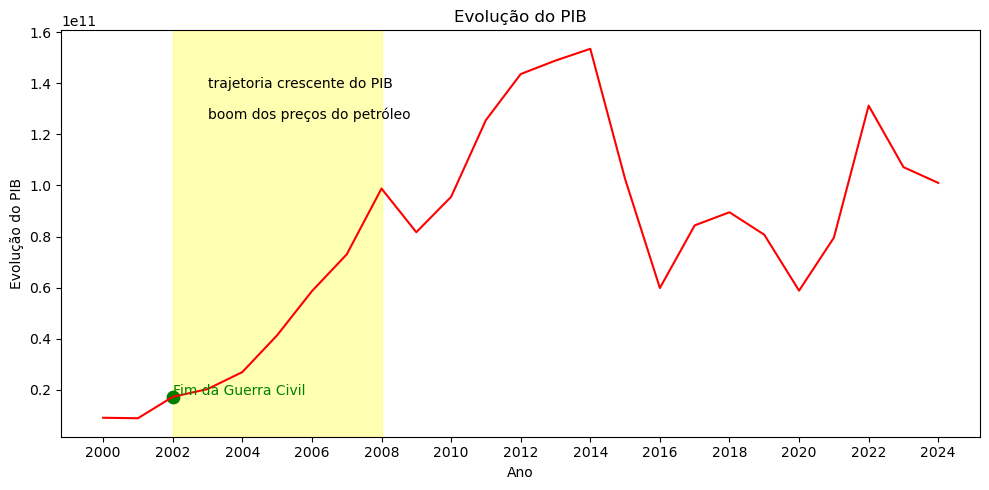

In [443]:
import matplotlib.pyplot as plt

# garantir que a coluna date é numérica
df_clean["date"] = df_clean["date"].astype(int)

# filtrar apenas 2000–2024
df_clean = df_clean[(df_clean["date"] >= 2000) & (df_clean["date"] <= 2024)]

plt.figure(figsize=(10,5))

# destacar período 2002–2008 em amarelo
plt.axvspan(2002, 2008, color="yellow", alpha=0.3)

# textos dentro da faixa amarela
plt.text(2003, df_clean["value"].max() * 0.90, "trajetoria crescente do PIB", color="black")
plt.text(2003, df_clean["value"].max() * 0.82, "boom dos preços do petróleo", color="black")

# linha vermelha do gráfico
plt.plot(df_clean["date"], df_clean["value"], color="red", label="Evolução do PIB")

# mostrar apenas anos de 2000 a 2024
plt.xticks(range(2000, 2025, 2))

# assinalar 2002 - fim da guerra civil
if 2002 in df_clean["date"].values:
    valor_2002 = df_clean.loc[df_clean["date"] == 2002, "value"].iloc[0]
    plt.scatter(2002, valor_2002, color="green", s=80)
    plt.text(2002, valor_2002 * 1.05, "Fim da Guerra Civil", color="green")

plt.title("Evolução do PIB")
plt.xlabel("Ano")
plt.ylabel("Evolução do PIB")
plt.grid(False)
plt.tight_layout()
plt.show()


## Numa primeira análise verificamos que o PIB de Angola ganhou uma trajetoria crescente entre 2000-2009, tendo atingido o pico em 2009, esse crescimento de acordo a alguns economistas, foi fruto do boom dos preços do petroleo e também do termino da guerra civil em Angola. 

## Aqui vamos analisar a variação da pobreza 

In [450]:
import requests
import pandas as pd

# Indicador de pobreza: SI.POV.DDAY
url = "https://api.worldbank.org/v2/country/AGO/indicator/SI.POV.DDAY?format=json&per_page=20000"

resposta = requests.get(url)

dados = resposta.json()

# A lista de dados está no índice 1
df_Pob = pd.json_normalize(dados[1])

print(df_Pob.head())



  countryiso3code  date  value unit obs_status  decimal indicator.id  \
0             AGO  2024    NaN                        1  SI.POV.DDAY   
1             AGO  2023    NaN                        1  SI.POV.DDAY   
2             AGO  2022    NaN                        1  SI.POV.DDAY   
3             AGO  2021    NaN                        1  SI.POV.DDAY   
4             AGO  2020    NaN                        1  SI.POV.DDAY   

                                     indicator.value country.id country.value  
0  Poverty headcount ratio at $3.00 a day (2021 P...         AO        Angola  
1  Poverty headcount ratio at $3.00 a day (2021 P...         AO        Angola  
2  Poverty headcount ratio at $3.00 a day (2021 P...         AO        Angola  
3  Poverty headcount ratio at $3.00 a day (2021 P...         AO        Angola  
4  Poverty headcount ratio at $3.00 a day (2021 P...         AO        Angola  


In [452]:
display(df_Pob)

,countryiso3code,date,value,unit,obs_status,decimal,indicator.id,indicator.value,country.id,country.value
0,AGO,2024,NaN,,,1,SI.POV.DDAY,Poverty headcount ratio at $3.00 a day (2021 P...,AO,Angola
1,AGO,2023,NaN,,,1,SI.POV.DDAY,Poverty headcount ratio at $3.00 a day (2021 P...,AO,Angola
2,AGO,2022,NaN,,,1,SI.POV.DDAY,Poverty headcount ratio at $3.00 a day (2021 P...,AO,Angola
3,AGO,2021,NaN,,,1,SI.POV.DDAY,Poverty headcount ratio at $3.00 a day (2021 P...,AO,Angola
4,AGO,2020,NaN,,,1,SI.POV.DDAY,Poverty headcount ratio at $3.00 a day (2021 P...,AO,Angola
...,...,...,...,...,...,...,...,...,...,...
60,AGO,1964,NaN,,,1,SI.POV.DDAY,Poverty headcount ratio at $3.00 a day (2021 P...,AO,Angola
61,AGO,1963,NaN,,,1,SI.POV.DDAY,Poverty headcount ratio at $3.00 a day (2021 P...,AO,Angola
62,AGO,1962,NaN,,,1,SI.POV.DDAY,Poverty headcount ratio at $3.00 a day (2021 P...,AO,Angola
63,AGO,1961,NaN,,,1,SI.POV.DDAY,Poverty headcount ratio at $3.00 a day (2021 P...,AO,Angola


In [454]:
df_Pob.info

<bound method DataFrame.info of    countryiso3code  date  value unit obs_status  decimal indicator.id  \
0              AGO  2024    NaN                        1  SI.POV.DDAY   
1              AGO  2023    NaN                        1  SI.POV.DDAY   
2              AGO  2022    NaN                        1  SI.POV.DDAY   
3              AGO  2021    NaN                        1  SI.POV.DDAY   
4              AGO  2020    NaN                        1  SI.POV.DDAY   
..             ...   ...    ...  ...        ...      ...          ...   
60             AGO  1964    NaN                        1  SI.POV.DDAY   
61             AGO  1963    NaN                        1  SI.POV.DDAY   
62             AGO  1962    NaN                        1  SI.POV.DDAY   
63             AGO  1961    NaN                        1  SI.POV.DDAY   
64             AGO  1960    NaN                        1  SI.POV.DDAY   

                                      indicator.value country.id country.value  
0   Povert

In [456]:
df_Pob = df_Pob.dropna(subset=["value"]).copy()


In [458]:
display (df_Pob)

,countryiso3code,date,value,unit,obs_status,decimal,indicator.id,indicator.value,country.id,country.value
6,AGO,2018,39.3,,,1,SI.POV.DDAY,Poverty headcount ratio at $3.00 a day (2021 P...,AO,Angola
16,AGO,2008,22.1,,,1,SI.POV.DDAY,Poverty headcount ratio at $3.00 a day (2021 P...,AO,Angola
24,AGO,2000,27.0,,,1,SI.POV.DDAY,Poverty headcount ratio at $3.00 a day (2021 P...,AO,Angola


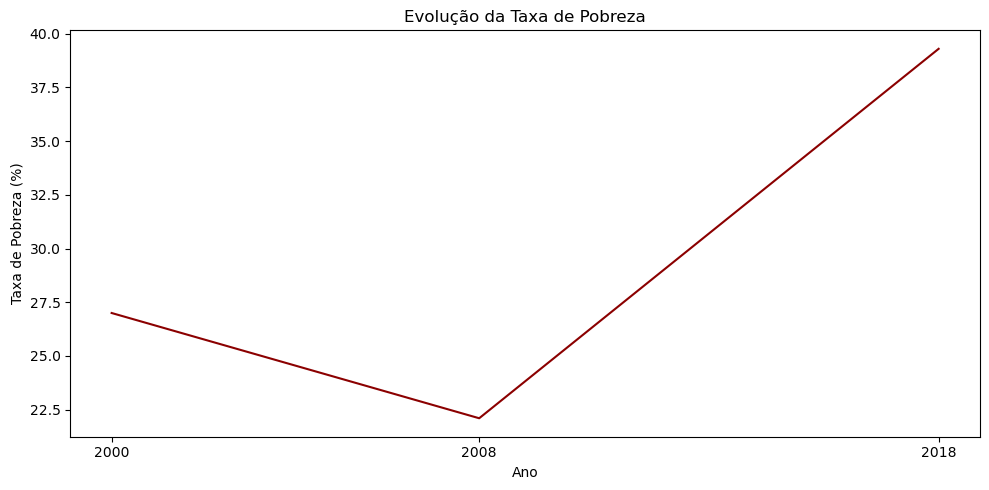

In [466]:
import matplotlib.pyplot as plt

# garantir que a coluna date é numérica
df_Pob["date"] = df_Pob["date"].astype(int)

plt.figure(figsize=(10,5))

# gráfico com eixo X explícito
plt.plot(df_Pob["date"], df_Pob["value"], color="darkred", label="Taxa de Pobreza")

# forçar anos inteiros no eixo X
plt.xticks(df_Pob["date"])

plt.title("Evolução da Taxa de Pobreza")
plt.xlabel("Ano")
plt.ylabel("Taxa de Pobreza (%)")
plt.grid(False)
plt.tight_layout()
plt.show()


## Verificamos que entre 2000-2008 angola verificou uma leve redução da sua taxa de pobreza, entretanto essa redução não foi sustentavel tendo a taxa de pobreza aumentando mais do que o dobro do que reduziu nos anos anteriores , o que pode indicar que essa redução da pobreza foi uma situação conjuntural ,  e que neste periodo não se criaram condições estruturais para que a economia pudesse continuar a reduzir a pobreza 

In [ ]:
Agora vamos analisar a taxa do desemprego 

In [471]:
import requests
import pandas as pd

# Indicador de pobreza: SI.POV.DDAY
url = "https://api.worldbank.org/v2/country/AGO/indicator/SL.UEM.TOTL.ZS?format=json&per_page=20000"

resposta = requests.get(url)
dados = resposta.json()

# A lista de dados está no índice 1
df_des = pd.json_normalize(dados[1])

print(df.head())


   countryiso3code  date  value unit obs_status  decimal    indicator.id  \
64             AGO  1960    NaN                        0  NY.GDP.MKTP.CD   
63             AGO  1961    NaN                        0  NY.GDP.MKTP.CD   
62             AGO  1962    NaN                        0  NY.GDP.MKTP.CD   
61             AGO  1963    NaN                        0  NY.GDP.MKTP.CD   
60             AGO  1964    NaN                        0  NY.GDP.MKTP.CD   

      indicator.value country.id country.value  
64  GDP (current US$)         AO        Angola  
63  GDP (current US$)         AO        Angola  
62  GDP (current US$)         AO        Angola  
61  GDP (current US$)         AO        Angola  
60  GDP (current US$)         AO        Angola  


In [473]:
df_des.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 65 entries, 0 to 64
Data columns (total 10 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   countryiso3code  65 non-null     object 
 1   date             65 non-null     object 
 2   value            34 non-null     float64
 3   unit             65 non-null     object 
 4   obs_status       65 non-null     object 
 5   decimal          65 non-null     int64  
 6   indicator.id     65 non-null     object 
 7   indicator.value  65 non-null     object 
 8   country.id       65 non-null     object 
 9   country.value    65 non-null     object 
dtypes: float64(1), int64(1), object(8)
memory usage: 5.2+ KB


In [475]:
df_des = df_des[df_des["value"].notna()]

In [477]:
df_des.info()

<class 'pandas.core.frame.DataFrame'>
Index: 34 entries, 0 to 33
Data columns (total 10 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   countryiso3code  34 non-null     object 
 1   date             34 non-null     object 
 2   value            34 non-null     float64
 3   unit             34 non-null     object 
 4   obs_status       34 non-null     object 
 5   decimal          34 non-null     int64  
 6   indicator.id     34 non-null     object 
 7   indicator.value  34 non-null     object 
 8   country.id       34 non-null     object 
 9   country.value    34 non-null     object 
dtypes: float64(1), int64(1), object(8)
memory usage: 2.9+ KB


In [479]:
df_des= df_des[[
    "date", 
    "value",
]].copy()


In [487]:
df_des.head()

,date,value
0,2024,14.464
1,2023,14.537
2,2022,14.602
3,2021,15.799
4,2020,16.690


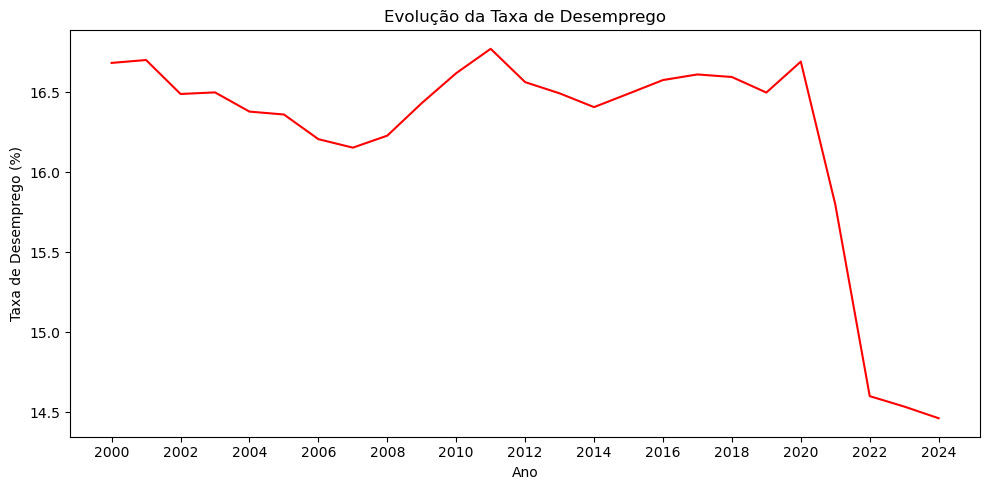

In [497]:
import matplotlib.pyplot as plt

# garantir que a coluna date é numérica
df_des["date"] = df_des["date"].astype(int)

# filtrar apenas 2000–2024
df_des = df_des[(df_des["date"] >= 2000) & (df_des["date"] <= 2024)]

plt.figure(figsize=(10,5))

# gráfico com linha vermelha
plt.plot(df_des["date"], df_des["value"], color="red", label="Taxa de desemprego")

# eixo X com anos espaçados
plt.xticks(range(2000, 2025, 2))  # mostra de 2 em 2 anos

plt.title("Evolução da Taxa de Desemprego")
plt.xlabel("Ano")
plt.ylabel("Taxa de Desemprego (%)")
plt.grid(False)
plt.tight_layout()
plt.show()




## Embora entre 2000 até 2024 verificamos que houve uma redução da taxa de desemprego, 2024 verificou o valor mais baixo da serie com uma taxa de 14.4% , porém esta taxa ainda é uma taxa muito alta, considerando que grande parte da população em Angola é jovem .

In [507]:
pip install wbgapi

In [517]:
df_pop = wb.data.DataFrame('SP.POP.TOTL', economy='AGO')
df_pop = df_pop.reset_index()

df_pop.columns


Index(['economy', 'YR1960', 'YR1961', 'YR1962', 'YR1963', 'YR1964', 'YR1965',
       'YR1966', 'YR1967', 'YR1968', 'YR1969', 'YR1970', 'YR1971', 'YR1972',
       'YR1973', 'YR1974', 'YR1975', 'YR1976', 'YR1977', 'YR1978', 'YR1979',
       'YR1980', 'YR1981', 'YR1982', 'YR1983', 'YR1984', 'YR1985', 'YR1986',
       'YR1987', 'YR1988', 'YR1989', 'YR1990', 'YR1991', 'YR1992', 'YR1993',
       'YR1994', 'YR1995', 'YR1996', 'YR1997', 'YR1998', 'YR1999', 'YR2000',
       'YR2001', 'YR2002', 'YR2003', 'YR2004', 'YR2005', 'YR2006', 'YR2007',
       'YR2008', 'YR2009', 'YR2010', 'YR2011', 'YR2012', 'YR2013', 'YR2014',
       'YR2015', 'YR2016', 'YR2017', 'YR2018', 'YR2019', 'YR2020', 'YR2021',
       'YR2022', 'YR2023', 'YR2024'],
      dtype='object')

In [531]:
import wbgapi as wb
import pandas as pd

# carregar população
df_pop = wb.data.DataFrame('SP.POP.TOTL', economy='AGO')
df_pop = df_pop.reset_index()

# transformar de wide para long
df_pop_long = df_pop.melt(
    id_vars='economy',
    var_name='date',
    value_name='Populacao'
)

# remover prefixo 'YR' e converter para inteiro
df_pop_long['date'] = df_pop_long['date'].str.replace('YR', '').astype(int)

# filtrar apenas 2000–2024
df_pop_long = df_pop_long[(df_pop_long['date'] >= 2000) & (df_pop_long['date'] <= 2024)]

df_pop_long.head()



,economy,date,Populacao
40,AGO,2000,16194869.0
41,AGO,2001,16747208.0
42,AGO,2002,17327699.0
43,AGO,2003,17943712.0
44,AGO,2004,18600423.0


In [533]:
df_pop_long.tail()

,economy,date,Populacao
60,AGO,2020,33451132.0
61,AGO,2021,34532429.0
62,AGO,2022,35635029.0
63,AGO,2023,36749906.0
64,AGO,2024,37885849.0


## Ao analisar a população de Angola, entre 2000-2024 verifcamos que a  população variou de 16 milhões a 37 milhhões de habitantes, o grande problemma é que grande parte dessa população é jovem e enfrente uma taxa de desemprego elevada tendo estado sempre acima dos 13% no período em analise. Está situação coloca em risco as contas públicas dado que é muita gente em fase de idade laboral que deixa de contribuir e também reduz o bem estar das familias Angolanas. 

##     Conclusões ###

Embora a economia de Angola tenha registado períodos de crescimento expressivo entre 2000 e 2024, esse dinamismo não foi suficiente para construir uma estrutura económica capaz de reduzir o desemprego para níveis aceitáveis ou, pelo menos, aproximá-lo da média da região onde o país se insere. A África Subsaariana apresenta uma taxa média de desemprego em torno de 5%, enquanto Angola mantém valores quase três vezes superiores, revelando um desfasamento estrutural significativo.

Este cenário torna‑se ainda mais preocupante quando se considera que grande parte da população angolana é jovem. Sem oportunidades formais de emprego, muitos acabam por recorrer ao mercado informal ou até a atividades ilícitas, o que limita o desenvolvimento humano e económico do país. Assim, apesar do crescimento da riqueza nacional ao longo das últimas décadas, esse progresso não se traduziu numa melhoria proporcional das condições de vida da população, sobretudo quando comparado com a média regional.


In [545]:
df_clean.columns
df_Pob.columns
df_des.columns
df_pop_long.columns


Index(['economy', 'date', 'Populacao'], dtype='object')

In [553]:
df_clean.columns
df_Pob.columns
df_des.columns


Index(['date', 'value'], dtype='object')

In [555]:
df_clean = df_clean.rename(columns={"value": "PIB"})


In [557]:
df_clean.columns


Index(['countryiso3code', 'date', 'PIB', 'unit', 'obs_status', 'decimal',
       'indicator.id', 'indicator.value', 'country.id', 'country.value'],
      dtype='object')

In [561]:
df_Pob.columns
df_des.columns


Index(['date', 'value'], dtype='object')

In [567]:
df_Pob = df_Pob.rename(columns={"value": "Pobreza"})
df_des = df_des.rename(columns={"value": "Desemprego"})


In [569]:
df_merge = (
    df_clean[["date", "PIB"]]
    .merge(df_Pob[["date", "Pobreza"]], on="date", how="outer")
    .merge(df_des[["date", "Desemprego"]], on="date", how="outer")
    .merge(df_pop_long[["date", "Populacao"]], on="date", how="outer")
)

df_merge = df_merge.sort_values("date").reset_index(drop=True)


In [573]:
df_merge.tail()

,date,PIB,Pobreza,Desemprego,Populacao
20,2020,5.885246e+10,NaN,16.690,33451132.0
21,2021,7.955954e+10,NaN,15.799,34532429.0
22,2022,1.312122e+11,NaN,14.602,35635029.0
23,2023,1.071677e+11,NaN,14.537,36749906.0
24,2024,1.009989e+11,NaN,14.464,37885849.0


In [575]:
df_merge.to_excel("angola_indicadores_2000_2024.xlsx", index = False)